# Keras API Project Exercise

## The Data

subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

predicting 

### Data Overview



<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
data_info = pd.read_csv('data/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


making a function to more easily obtain the description of my features

In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data

In [6]:
df = pd.read_csv('data/lending_club_loan_two.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis


<AxesSubplot: xlabel='loan_status', ylabel='count'>

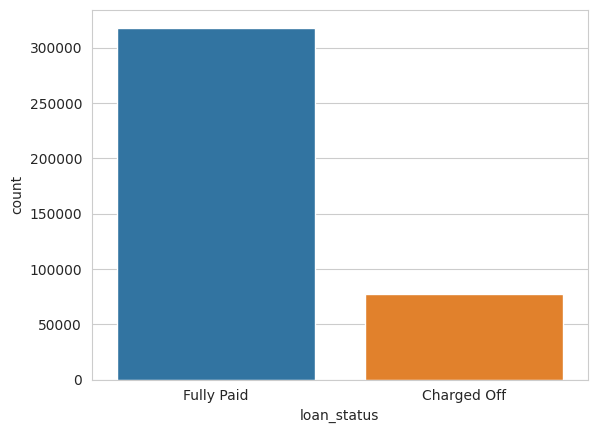

In [8]:
sns.countplot(x='loan_status', data=df)

### Countplot of our label, definate sway towards the loan being payed off might by an issue with bias, for this model we probably want to favour accuracy than recall when it comes to giving out loans

/tmp/ipykernel_31805/701326092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['loan_amnt'],kde=False)


<AxesSubplot: xlabel='loan_amnt'>

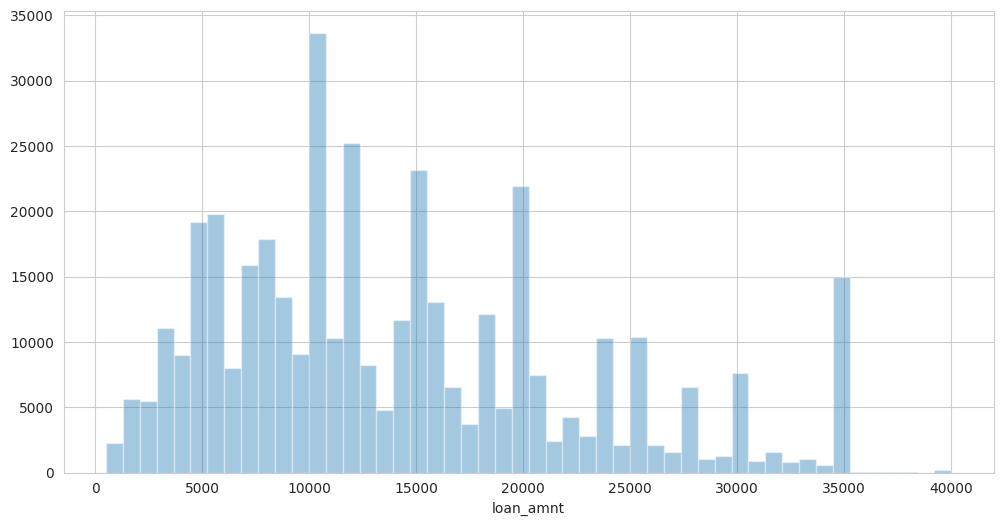

In [9]:
plt.figure(figsize=(12,6))
sns.distplot(a=df['loan_amnt'],kde=False)

### Definate peaks aroundround figures every $5000

exploring correlation between features

In [10]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot: >

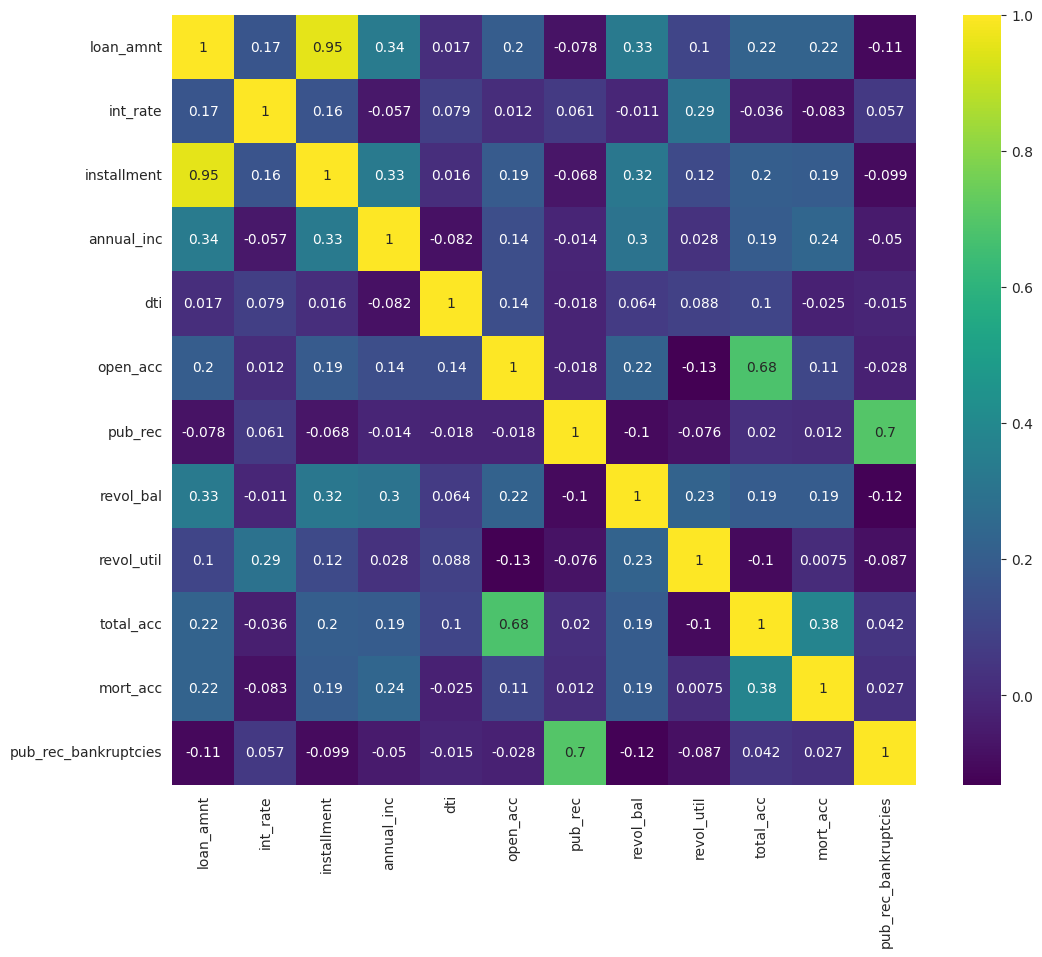

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')


In [12]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [13]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


## Almost perfect correlation with loan amount and the installment -> installment will be some function of the amount taken out divided by duration + intrest

<AxesSubplot: xlabel='installment', ylabel='loan_amnt'>

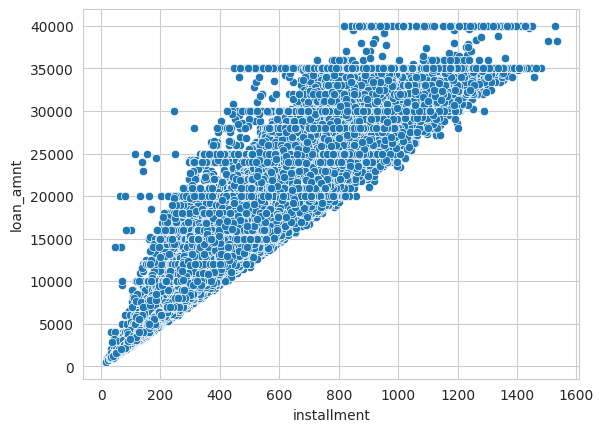

In [14]:
sns.scatterplot(x='installment',y='loan_amnt', data=df)

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

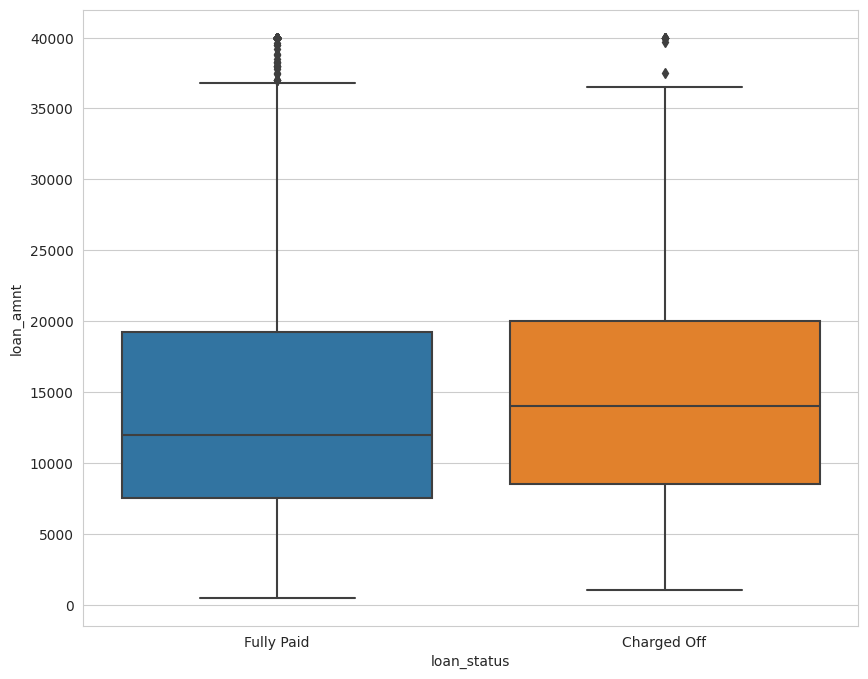

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

## as expected samples defaulting on their loan have higher loan amounts taken out

**summary statistics for the loan amount, grouped by the loan_status**

In [16]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**exploring the effect of grade and subgrade**

In [17]:
print(sorted(df['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [18]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


**countplot of grade against discriminated by loan_status)

<AxesSubplot: xlabel='grade', ylabel='count'>

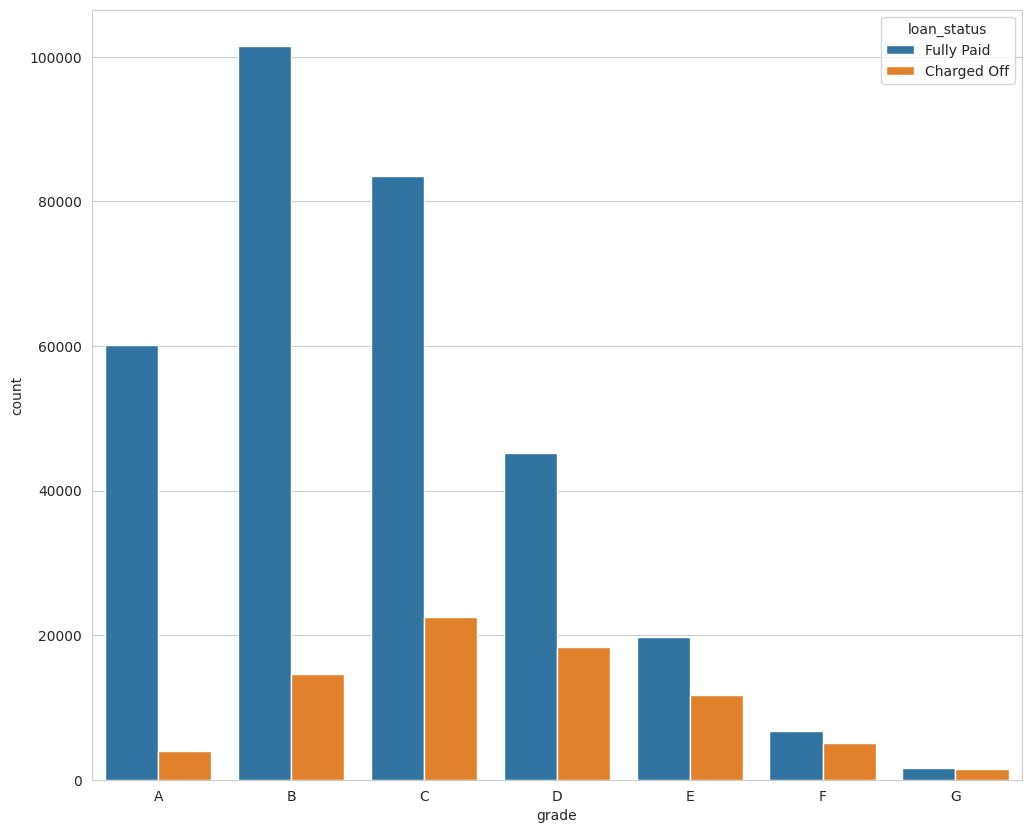

In [19]:
sorted_order = sorted(df['grade'].unique())
plt.figure(figsize=(12,10))
sns.countplot(x='grade',data=df, order=sorted_order, hue='loan_status')

**now segment this again by subgrade**

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

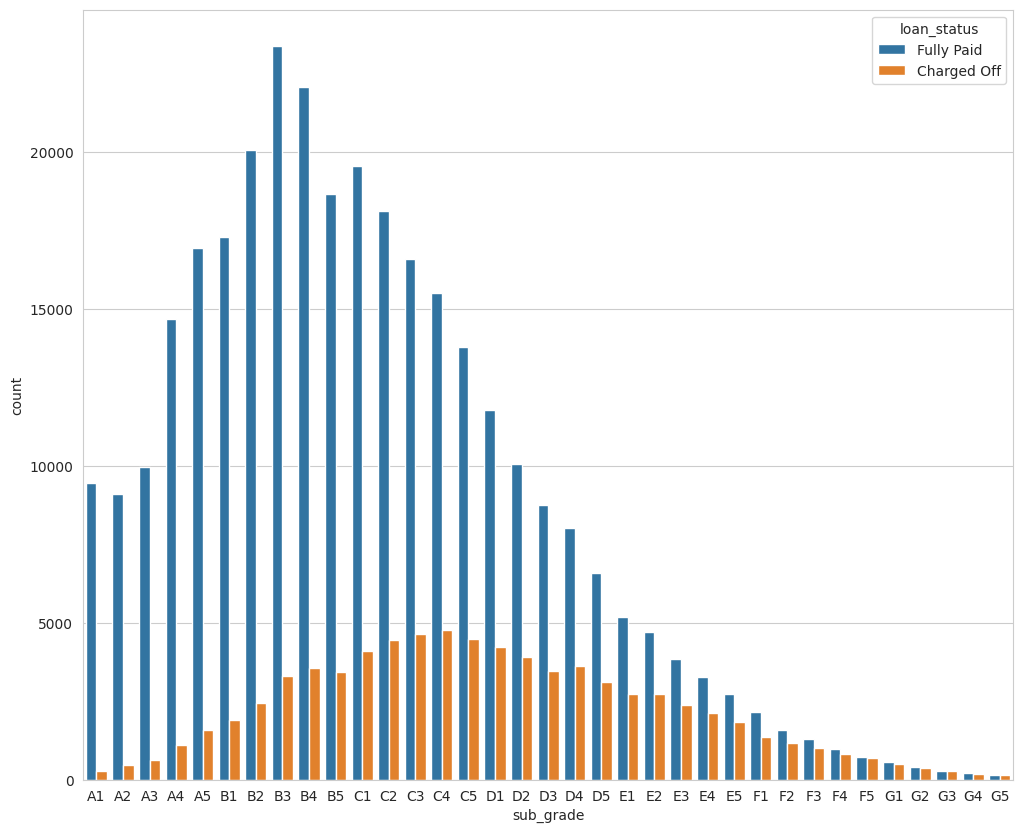

In [20]:
plt.figure(figsize=(12,10))
sorted_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=sorted_order, hue='loan_status')

**Isloating F and G grades those and recreate the countplot just for those subgrades.**

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

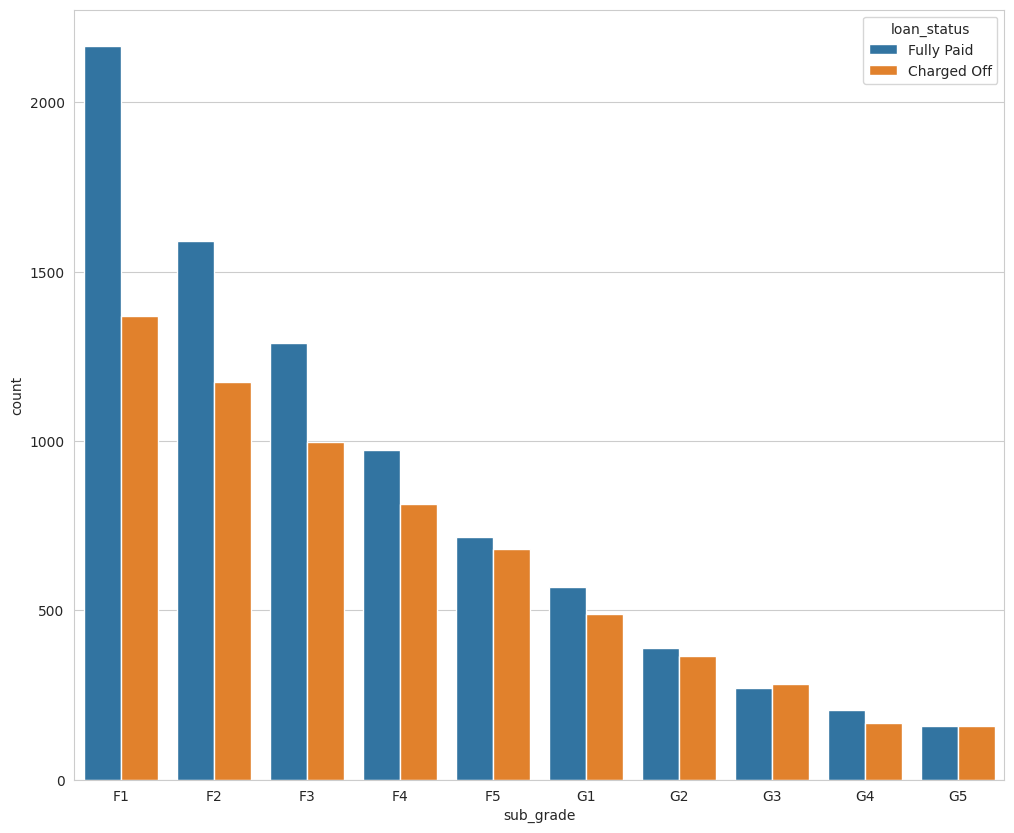

In [21]:
# CODE HERE
f_and_g = df[(df['grade'] == 'F')|(df['grade'] == 'G')]
sorted_order = sorted(f_and_g['sub_grade'].unique())
plt.figure(figsize=(12,10))
sns.countplot(x='sub_grade',data=f_and_g,order=sorted_order,hue='loan_status')

#### From this data set, subgrade G3 appears to have the lowest ratio of members paying back there loan

### Encode loan_repaid as 0, 1 for fitting our model

In [22]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':0,'Charged Off':1})

In [23]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",1


A bar plot showing the correlation of the numeric features to the new loan_repaid column

Text(0.5, 0, 'Correlation with loan_repaid')

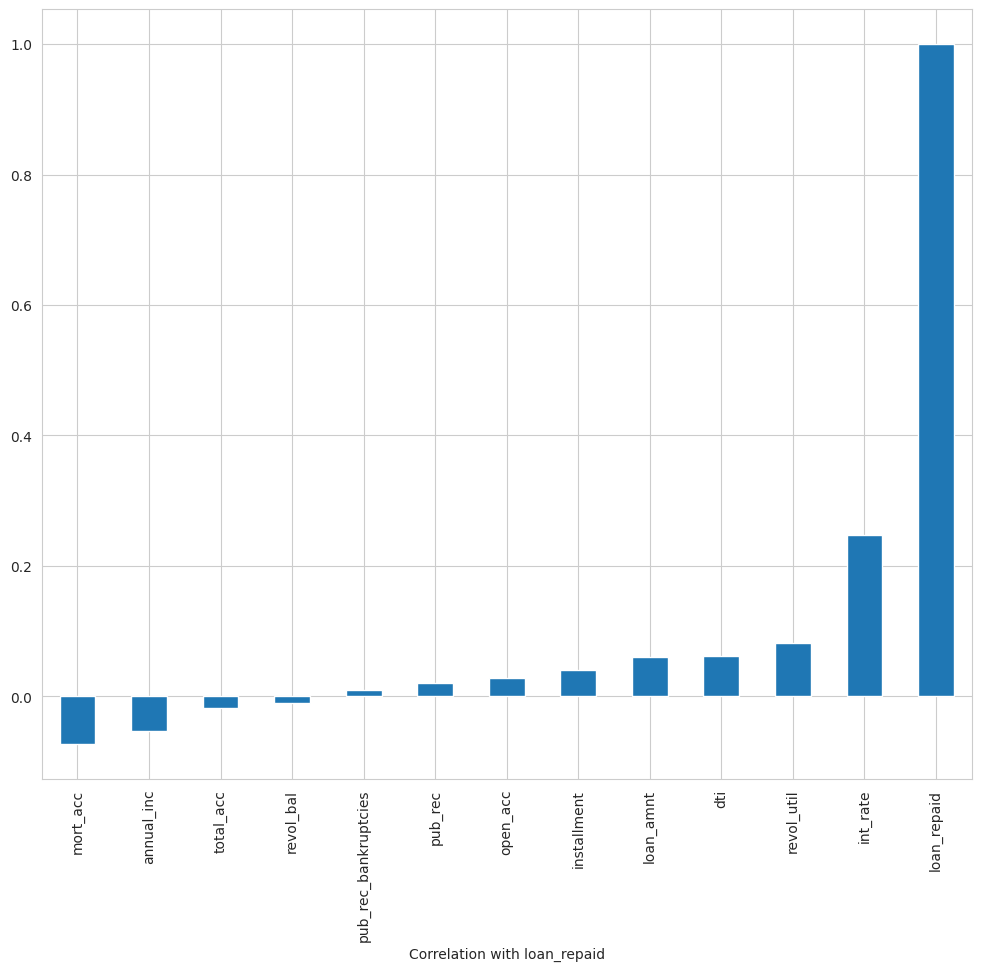

In [24]:

plt.figure(figsize=(12,10))
df.corr()['loan_repaid'].sort_values().plot(kind='bar')
plt.xlabel('Correlation with loan_repaid')

# Data PreProcessing

* Removing or fill any missing data. 
* Removing unnecessary or repetitive features. 
* Encoding Categorical features

## Missing Data


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Data frame contains 396030 entries

**finding the null vales in my dataframe**

In [26]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**As a percentage of the total DataFrame**

In [27]:
100 * df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**is it okay to drop emp_title and emp_length?**

In [28]:
print(feat_info('emp_title'))

The job title supplied by the Borrower when applying for the loan.*
None


In [29]:
print(feat_info('emp_length'))

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


**TASK: How many unique employment job titles are there?**

In [30]:
df['emp_title'].nunique()

173105

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature.**

In [31]:
df.drop('emp_title', axis=1, inplace=True)

In [32]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",1


**Creating a count plot of the emp_length feature column.**

In [33]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [34]:
sorted_order = [
    '< 1 year',
    '1 year',
     '2 years',
     '3 years',
     '4 years',
     '5 years',
     '6 years',
     '7 years',
     '8 years',
     '9 years',
    '10+ years']

<AxesSubplot: xlabel='emp_length', ylabel='count'>

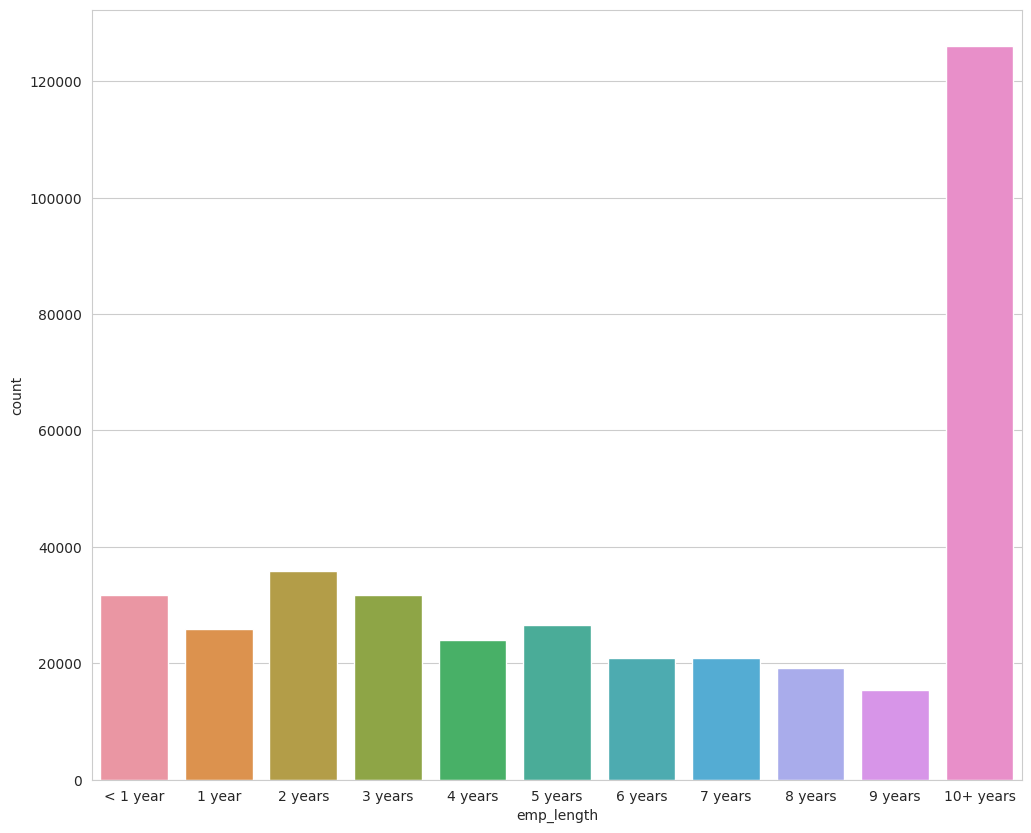

In [35]:
plt.figure(figsize=(12,10))
sns.countplot(x='emp_length', data=df, order=sorted_order)

**Ploting out the countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot: xlabel='emp_length', ylabel='count'>

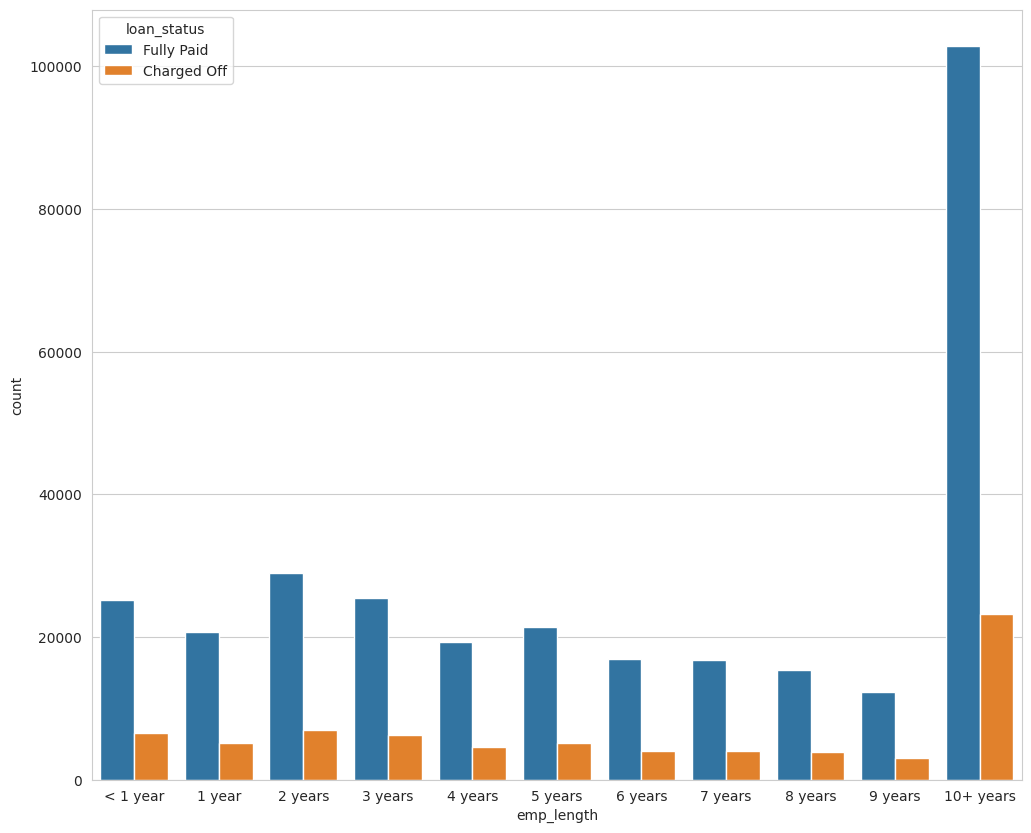

In [36]:
plt.figure(figsize=(12,10))
sns.countplot(x='emp_length',data=df, order=sorted_order, hue='loan_status')


**doesn't tell us much scale this so we can see if the ratio changes depending on emp_length**

In [37]:
length = df[['emp_length', 'loan_status']]


In [38]:
emp_length_loan_pay = length.groupby('emp_length').describe()['loan_status']['freq']/length.groupby('emp_length').describe()['loan_status']['count']

In [39]:
emp_length_loan_pay

emp_length
1 year       0.800865
10+ years    0.815814
2 years      0.806738
3 years      0.804769
4 years      0.807615
5 years      0.807813
6 years      0.810806
7 years      0.805226
8 years       0.80024
9 years       0.79953
< 1 year     0.793128
dtype: object

In [40]:
d = {'emp_length':['1 year','10+ years','2 years','3 years','4 years',
                   '5 years','6 years','7 years','8 years','9 years','< 1 year'],
    'percentage_payback':list(emp_length_loan_pay)}
plot = pd.DataFrame(data=d)
plot

,emp_length,percentage_payback
0,1 year,0.800865
1,10+ years,0.815814
2,2 years,0.806738
3,3 years,0.804769
4,4 years,0.807615
5,5 years,0.807813
6,6 years,0.810806
7,7 years,0.805226
8,8 years,0.800240
9,9 years,0.799530


<AxesSubplot: xlabel='emp_length', ylabel='percentage_payback'>

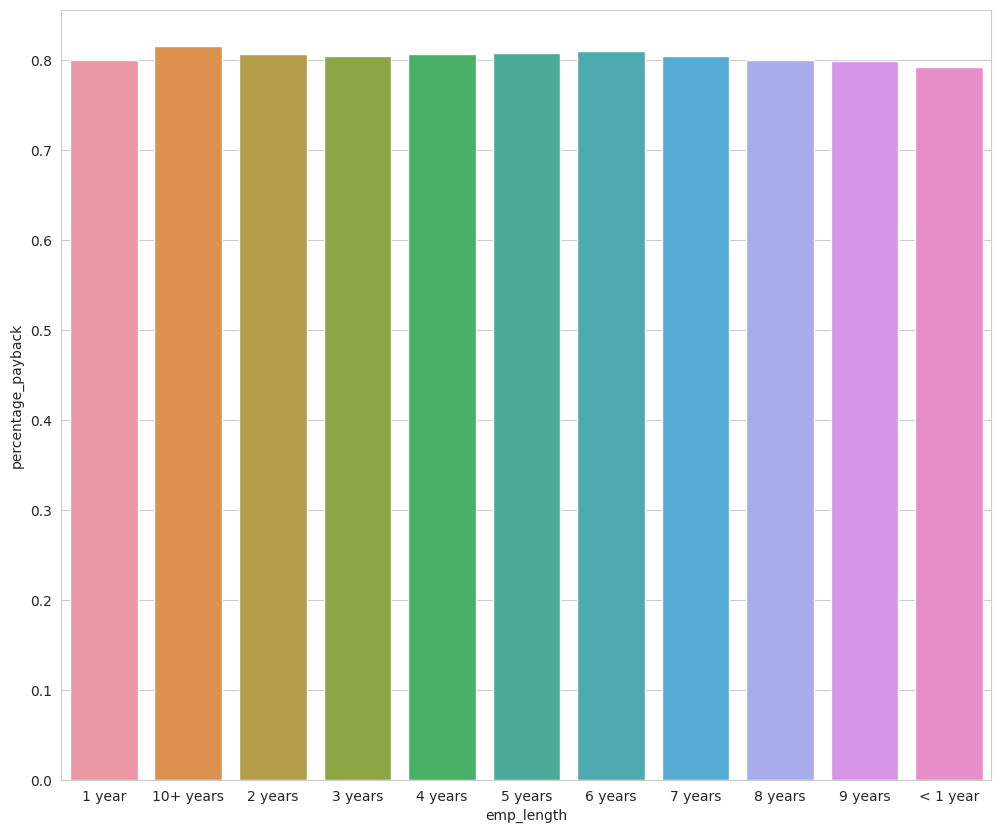

In [41]:
plt.figure(figsize=(12,10))
sns.barplot(x='emp_length', y='percentage_payback', data=plot)

**Charge off rates are extremely similar across all employment lengths. Remove emp_length as a feature.**

In [42]:
df.drop('emp_length', axis=1, inplace=True)

**Revisiting the DataFrame to see what feature columns still have missing data.**

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [44]:
feat_info('mort_acc')

Number of mortgage accounts.


**Possible that title and purpose contain repeated information?**

In [45]:
df[df['title']==df['purpose']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 410 to 394758
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             726 non-null    float64
 1   term                  726 non-null    object 
 2   int_rate              726 non-null    float64
 3   installment           726 non-null    float64
 4   grade                 726 non-null    object 
 5   sub_grade             726 non-null    object 
 6   home_ownership        726 non-null    object 
 7   annual_inc            726 non-null    float64
 8   verification_status   726 non-null    object 
 9   issue_d               726 non-null    object 
 10  loan_status           726 non-null    object 
 11  purpose               726 non-null    object 
 12  title                 726 non-null    object 
 13  dti                   726 non-null    float64
 14  earliest_cr_line      726 non-null    object 
 15  open_acc          

In [46]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [47]:
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

**The title column is simply a string subcategory/description of the purpose column. drop the title column.**

In [48]:
df.drop('title', axis=1, inplace=True)

**deciding whether or not to drop mort_acc feature**

In [49]:
feat_info('mort_acc')

Number of mortgage accounts.


In [50]:
df['mort_acc'].isnull().sum()

37795

In [51]:
df['mort_acc'].value_counts()


0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**filling in this missing data by finding the most correlated value and finding the mean value for mort_account at that samples most correlated value**

In [52]:
df.corr()['mort_acc'] # total_acc most correlated

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid            -0.073111
Name: mort_acc, dtype: float64

In [53]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [54]:
correlation_mort_acc = df.groupby('total_acc').mean()['mort_acc']
correlation_mort_acc
        

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [55]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return correlation_mort_acc[total_acc]
    else:
        return mort_acc

df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']), axis=1)


In [56]:
df.isnull().sum()[df.isnull().sum() != 0]

revol_util              276
pub_rec_bankruptcies    535
dtype: int64

In [57]:
df.corr()['revol_util'].sort_values() # intrest rate most corr

open_acc               -0.131420
total_acc              -0.104273
pub_rec_bankruptcies   -0.086751
pub_rec                -0.075910
mort_acc                0.005821
annual_inc              0.027871
loan_repaid             0.082373
dti                     0.088375
loan_amnt               0.099911
installment             0.123915
revol_bal               0.226346
int_rate                0.293659
revol_util              1.000000
Name: revol_util, dtype: float64

In [58]:
correlation_revol= df.groupby('int_rate').mean()['revol_util']


In [59]:
def fill_revol(int_rate, revol_util):
    if np.isnan(revol_util):
        return correlation_revol[int_rate]
    else:
        return revol_util

df['revol_util'] = df.apply(lambda x: fill_revol(x['int_rate'],x['revol_util']), axis=1)


In [60]:
df['revol_util'].isnull().sum()

0

In [61]:
df.corr()['pub_rec_bankruptcies'].sort_values() # highest corr with public record rec

revol_bal              -0.124532
loan_amnt              -0.106539
installment            -0.098628
revol_util             -0.086783
annual_inc             -0.050162
open_acc               -0.027732
dti                    -0.014558
loan_repaid             0.009383
mort_acc                0.029276
total_acc               0.042035
int_rate                0.057450
pub_rec                 0.699408
pub_rec_bankruptcies    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [62]:
correlation_bankruptcies = df.groupby('pub_rec').mean()['pub_rec_bankruptcies']
correlation_bankruptcies
        

pub_rec
0.0     0.000000
1.0     0.810205
2.0     0.929863
3.0     1.074293
4.0     1.136622
5.0     1.113924
6.0     0.983607
7.0     0.821429
8.0     1.235294
9.0     1.250000
10.0    0.363636
11.0    0.000000
12.0    1.000000
13.0    0.500000
15.0    0.000000
17.0    1.000000
19.0    1.000000
24.0    0.000000
40.0    1.000000
86.0    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [63]:
def fill_mort_acc(pub_rec, pub_rec_bankruptcies):
    if np.isnan(pub_rec_bankruptcies):
        return correlation_bankruptcies[pub_rec]
    else:
        return pub_rec_bankruptcies

df['pub_rec_bankruptcies'] = df.apply(lambda x: fill_mort_acc(x['pub_rec'],x['pub_rec_bankruptcies']), axis=1)

In [64]:
df['pub_rec_bankruptcies'].isnull().sum()

0

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. remove the rows that are missing those values in those columns**

In [65]:
df['revol_util'].dropna(inplace=True)

In [66]:
df['pub_rec'].dropna(inplace=True)

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

In [67]:
# find all non numerical features
df.select_dtypes([object]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term feature
Convert the term feature into either a 36 or 60 integer numeric data type**

In [68]:
df['term'].value_counts()


 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [69]:
df['term'] = df['term'].apply(lambda x: x[:3])

In [70]:
df['term'] = pd.to_numeric(df['term'])
df['term'].dtype

dtype('int64')

### grade feature

**grade is part of sub_grade, so just drop the grade feature.**

In [71]:
df.drop('grade', axis=1, inplace=True)

**Converting the subgrade into dummy variables. Then concatenating these new columns to the original dataframe.**

In [72]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [73]:
df = pd.concat([df.drop('sub_grade',axis=1), dummies],axis=1)

In [74]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenating them with the original dataframe.**

In [75]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

In [76]:
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [77]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### home_ownership
**Reviewing the value_counts for the home_ownership column.**

In [78]:
#CODE HERE
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

**TASK: Converting these to dummy variables, replacing ANY or NONE with other**

In [79]:
#CODE HERE
def replace(x):
    if x == 'NONE' or x == 'ANY':
        return 'OTHER'
    else:
        return x
df['home_ownership'] = df['home_ownership'].apply(lambda x: replace(x))
df['home_ownership'].value_counts()


MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [80]:
dummies_home = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1), dummies_home], axis=1)

In [81]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

### address
**feature engineering a zip code column from the address in the data set.**

In [82]:
df['address'] = df['address'].apply(lambda x: x[-5:])

In [83]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [84]:
dummies_zip = pd.get_dummies(df['address'], drop_first=True)

In [85]:
df = pd.concat([df.drop('address', axis=1), dummies_zip],axis=1)


In [86]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

### issue_d 

**allowing this to be in our feature variables would be data leakage--->drop**

In [87]:
#CODE HERE
df.drop('issue_d', axis=1, inplace=True)

### earliest_cr_line to earliest_cr_year

In [88]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: x[-4:])

In [89]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [90]:
df['earliest_cr_year'] = pd.to_numeric(df['earliest_cr_year'])
df['earliest_cr_year'].dtype

dtype('int64')

## Train Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
df.drop('loan_status',axis=1,inplace=True)

In [93]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

In [94]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalizing the Data

**Using a MinMaxScaler to normalize the feature data**

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = MinMaxScaler()

In [98]:
scaler.fit(X_train)

MinMaxScaler()

In [99]:
X_train = scaler.transform(X_train)

In [100]:
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout



2022-09-29 15:21:13.529998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-29 15:21:14.207476: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-29 15:21:15.691505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/oliver/anaconda3/envs/tf/lib/
2022-09-29 15:21:15.692177: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin

## Creating our sequential model

In [102]:
model = Sequential()


# Hidden layers 
model.add(Dense(60,  activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')


2022-09-29 15:21:17.688428: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 15:21:17.766708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 15:21:17.767506: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 15:21:17.771322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [103]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test) 
          )

2022-09-29 15:21:19.479368: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 98849088 exceeds 10% of free system memory.
2022-09-29 15:21:19.614671: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 98849088 exceeds 10% of free system memory.


Epoch 1/25
1222/1238 [============================>.] - ETA: 0s - loss: 0.3429

2022-09-29 15:21:24.292381: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24712272 exceeds 10% of free system memory.
2022-09-29 15:21:24.335013: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24712272 exceeds 10% of free system memory.


1238/1238 [==============================] - 5s 3ms/step - loss: 0.3420 - val_loss: 0.2674
Epoch 2/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2757 - val_loss: 0.2632
Epoch 3/25
1238/1238 [==============================] - 3s 3ms/step - loss: 0.2704 - val_loss: 0.2643
Epoch 4/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2676 - val_loss: 0.2635
Epoch 5/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2664 - val_loss: 0.2645
Epoch 6/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2658 - val_loss: 0.2642
Epoch 7/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2655 - val_loss: 0.2635
Epoch 8/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2653 - val_loss: 0.2629
Epoch 9/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2647 - val_loss: 0.2623
Epoch 10/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.2645 - val_los

In [104]:
model_loss_batch_256 = pd.DataFrame(model.history.history)

<AxesSubplot: >

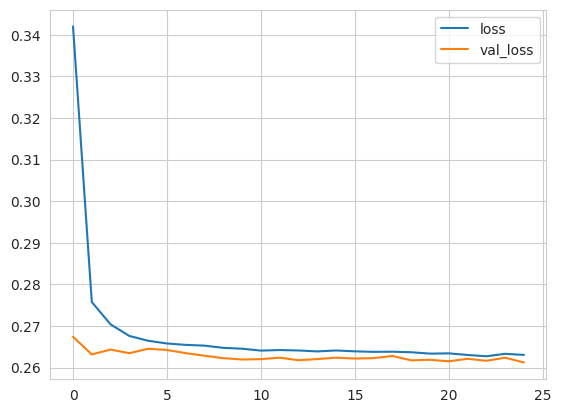

In [105]:
model_loss_batch_256.plot()

**Saving my model**

In [106]:
from tensorflow.keras.models import load_model

In [107]:
model.save('full_data_project_model_batch_256.h5')

## Model evaluation

In [108]:
predictions = (model.predict(X_test) > 0.5).astype("int32") 

  43/2476 [..............................] - ETA: 2s  

2022-09-29 15:22:35.856805: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24712272 exceeds 10% of free system memory.


2476/2476 [==============================] - 3s 1ms/step


In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[63607    22]
 [ 8868  6709]]


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     63629
           1       1.00      0.43      0.60     15577

    accuracy                           0.89     79206
   macro avg       0.94      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



### Our balance between precission and recall here is skewed a little too much to to precision rather than recall for customers not paying there loan 

## Selecting a random customer and checking that the model correcly predicts whether they repay the loan

In [111]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           24000.00
term                   60.00
int_rate               13.11
installment           547.43
annual_inc          85000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1991.00
Name: 304691, Length: 78, dtype: float64

In [112]:
model.predict(new_customer.values.reshape(1,78)).astype("int32")

1/1 [==============================] - 0s 21ms/step


array([[0]], dtype=int32)

### Returns 0 which symbolises that the customer is thought to have paid the loan off

In [113]:
df['loan_repaid'].iloc[random_ind]

0

### For this specific customer the model predicted correctly that they would pay back their loan

In [114]:
predictions = (model.predict(X_test) > 0.2).astype("int32") 

2476/2476 [==============================] - 3s 1ms/step


In [115]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[50988 12641]
 [ 3157 12420]]


              precision    recall  f1-score   support

           0       0.94      0.80      0.87     63629
           1       0.50      0.80      0.61     15577

    accuracy                           0.80     79206
   macro avg       0.72      0.80      0.74     79206
weighted avg       0.85      0.80      0.82     79206



## Reducing the value required to classify the output as charged off can help recall, This comes with the downside of losing customers as false positives for not paying off their loans. More concervative stratergy!